## Final Project Submission

Please fill out:
* Student name: 
    #### - Jubilant Mutuku 
    #### - Esther Nyawera 
    #### - Miriam Nguru 
    #### - Yusra Mohamed 
    #### - Ian Kedeyie 
    #### - Abdideq Adan 


* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Predicting King County House Prices with Multiple Linear Regression

# 1. Problem Description
The aim of this project is to develop a Multiple Linear Regression Model to accurately predict the sale prices of houses in King County. Through careful data analysis and exploratory data analysis techniques, we will preprocess and clean the dataset to create a data frame for regression modeling. By analyzing key features such as square footage, number of bedrooms, location(waterfront or not), and more, we aim to uncover valuable insights that influence house prices.

# 2. Business Objective
Business understanding is essential for a real estate agency to effectively serve its clients.It serves as the foundation for successful operations and sustainable growth in the real estate industry.You need to understand the listing prices and how it affects buyers and sellers in making informed decisions. Identifying the expectations, preferences and needs of the clients, knowing what the clients want from the agency’s services especially in terms of property evaluation is crucial. Factors considered in evaluation are: I. Size and layout, the size of the property, the number of bedrooms and bathrooms and the layout is crucial. II. Condition, the property’s condition, including any need of repairs or renovations can affect its value. III. Location: The property location influences its value, factors like proximity to school, parks, shopping malls and transportation can impact the value Gaining insight into the local housing market dynamics in the dataset such as the fluctuations in supply and demand, seasonality, and regional variations in property value is important .



In [29]:
# importing all necessary modules
import pandas as pd
import numpy as np
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## **Step 1: Reading and Understanding the Data**
Let's start with the following steps:

    - Importing data using the pandas library
    - Understanding the structure of the data

In [30]:
# Reading data
df = pd.read_csv("./data/kc_house_data.csv")

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [31]:
df.shape

(21597, 21)

In [32]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [34]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **Step 2 : Data Cleaning and Preparation**

In [35]:
# Removing recommended columns
df.drop(["date","view","sqft_above", "sqft_basement","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"], axis=1, inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [36]:
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [37]:
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
new_waterfront = {
    "NO":0,
    "YES":1
}
# df['waterfront'].str.replace(new_Waterfront)
new_cond = {
    'Very Good':5,
    'Average':4,
    'Good':3,
    'Poor':2,
    'Fair':1
}

new_grade = {
    '3 Poor':1,
    '4 Low':2,
    '5 Fair':3,
    '6 Low Average':4,
    '7 Average':5,
    '8 Good':6,
    '9 Better':7,
    '10 Very Good':8,
    '11 Excellent':9,
    '12 Luxury':10,
    '13 Mansion':11
}

df['waterfront'] = df['waterfront'].replace(new_waterfront)
df['condition'] = df['condition'].replace(new_cond)
df['grade'] = df['grade'].replace(new_grade)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,4,5,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,4,4,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,5,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,4,6,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,4,9,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,4,6,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,4,6,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,4,6,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,4,5,2009


In [40]:
df = df[df['bedrooms'] != 33]
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,4,5,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,4,4,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,5,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,4,6,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,4,9,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,4,6,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,4,6,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,4,6,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,4,5,2009


In [41]:
df = df.drop_duplicates()

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19218.0,4.592114e+09,2.877001e+09,1000102.0,2.124049e+09,3.905081e+09,7.334501e+09,9.900000e+09
price,19218.0,5.416318e+05,3.722760e+05,78000.0,3.220000e+05,4.500000e+05,6.443750e+05,7.700000e+06
bedrooms,19218.0,3.373140e+00,9.036769e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
bathrooms,19218.0,2.117052e+00,7.696217e-01,0.5,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,19218.0,2.082442e+03,9.226090e+02,370.0,1.430000e+03,1.920000e+03,2.550000e+03,1.354000e+04
sqft_lot,19218.0,1.507537e+04,4.082027e+04,520.0,5.040750e+03,7.620000e+03,1.071900e+04,1.651359e+06
floors,19218.0,1.495005e+00,5.401611e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19218.0,7.597044e-03,8.683157e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
condition,19218.0,3.789104e+00,6.113461e-01,1.0,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
grade,19218.0,5.660995e+00,1.176038e+00,1.0,5.000000e+00,5.000000e+00,6.000000e+00,1.100000e+01


## **step 3: Vitualization**

* Price spreed and Distribution
* Vitualizing categorical data
  - Waterfront	
  - condition	
  - grade
  - bedrooms
* Vitualizing numerical data


## 3.1 Price spreed and Distribution

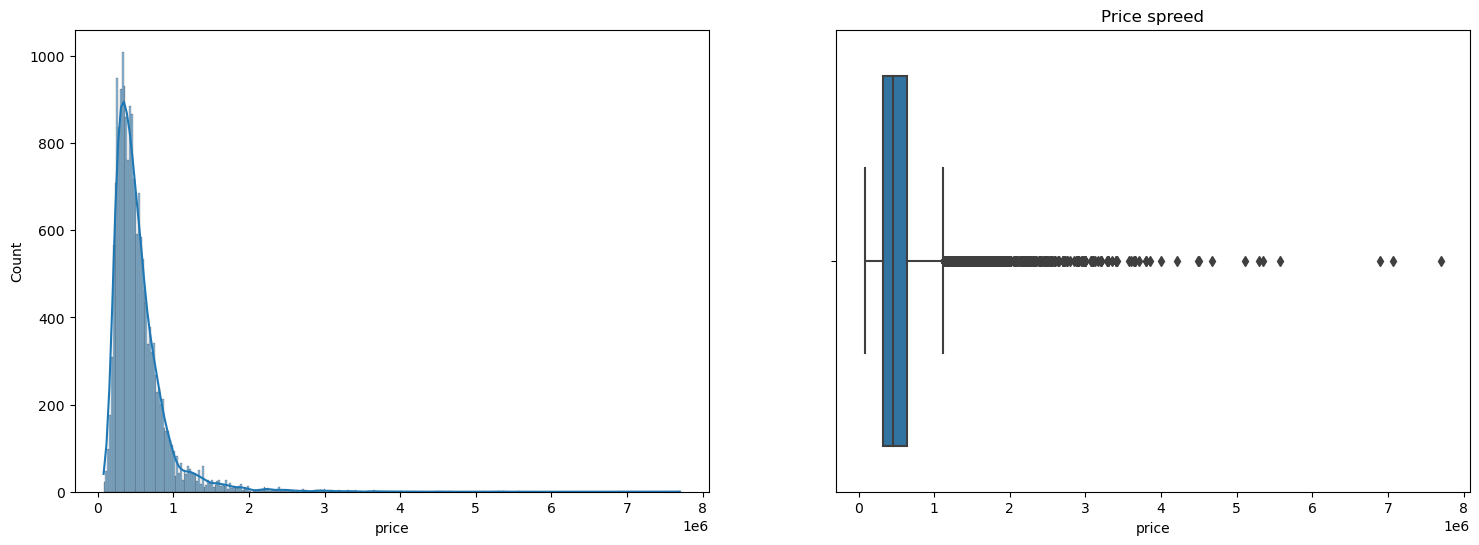

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

plt.title("Price distribution")
sns.histplot(df.price, kde=True, ax=ax1)

plt.title("Price spreed")
sns.boxplot(x=df['price'], ax=ax2)
plt.show()


### Inference
* The plot right-skewed, meaning that the most prices in the dataset are low than 1.
* There is a significant difference between the mean and the median of the price distribution.

### 3.2 Vitualizing cetegorical data

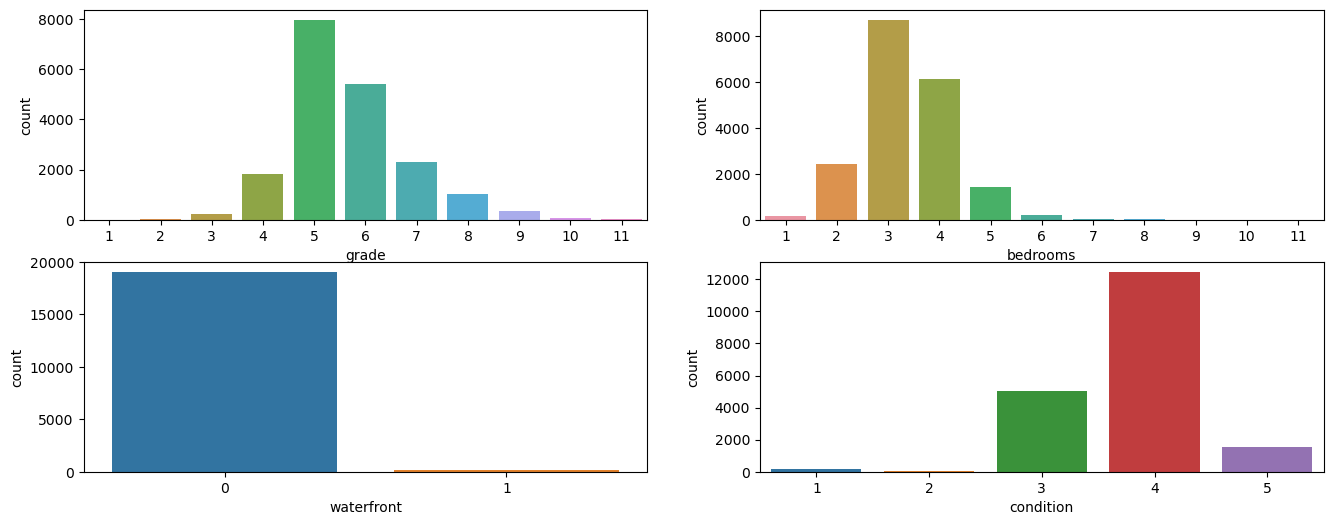

In [44]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 6))

sns.countplot(x='grade', data=df, ax=axes[0, 0])
sns.countplot(x='bedrooms', data=df, ax=axes[0, 1])
sns.countplot(x='waterfront', data=df, ax=axes[1, 0])
sns.countplot(x='condition', data=df, ax=axes[1, 1])

plt.show()

### **Inference**
* The majority of houses in the dataset do not have a waterfront view.
* Houses with an average condition are the most prevalent.
* The most common house configuration includes 3 bedrooms.
* The predominant grade for houses is 5, indicating a fair quality level.

In [45]:

correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['price']
correlation_with_price


id            -0.017436
price          1.000000
bedrooms       0.317748
bathrooms      0.527364
sqft_living    0.704666
sqft_lot       0.087010
floors         0.258300
waterfront     0.276298
condition      0.073814
grade          0.667255
yr_built       0.053532
Name: price, dtype: float64

Text(0, 0.5, 'price')

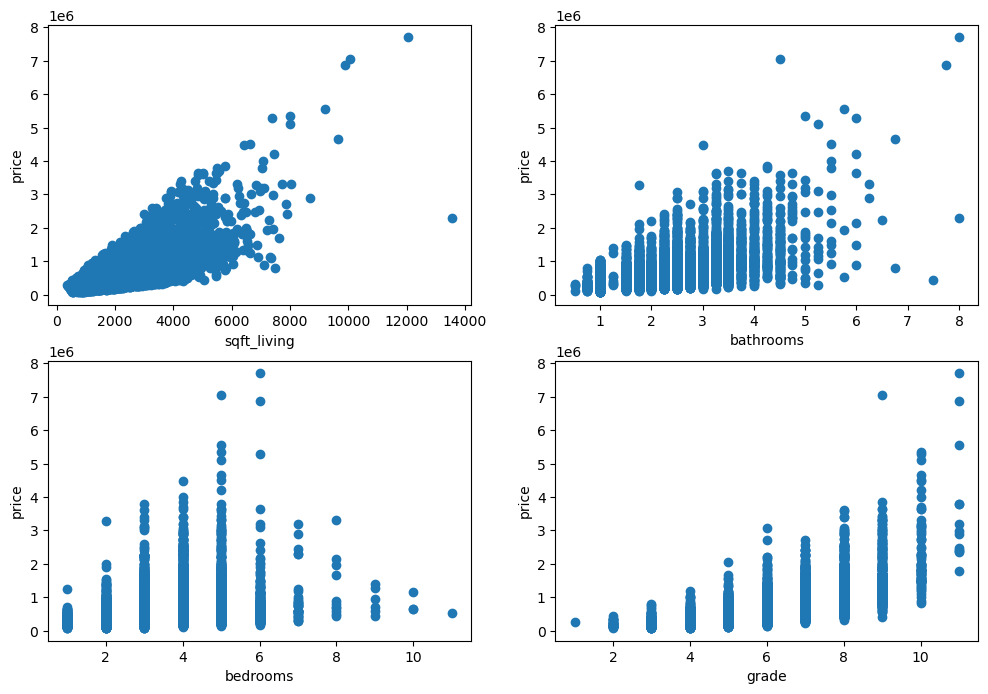

In [46]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))

axes[0, 0].scatter(x=df['sqft_living'], y=df['price'])
axes[0, 0].set_xlabel('sqft_living')
axes[0, 0].set_ylabel('price')

axes[0, 1].scatter(x=df['bathrooms'], y=df['price'])
axes[0, 1].set_xlabel('bathrooms')
axes[0, 1].set_ylabel('price')

axes[1, 0].scatter(x=df['bedrooms'], y=df['price'])
axes[1, 0].set_xlabel('bedrooms')
axes[1, 0].set_ylabel('price')

axes[1, 1].scatter(x=df['grade'], y=df['price'])
axes[1, 1].set_xlabel('grade')
axes[1, 1].set_ylabel('price')

### Inference
* Based on the analysis of the provided dataset and visualizations:

#### Average Correlation:

* Bathrooms, bedrooms, and grade show an average correlation with the price of the houses. These features have moderate relationships with the target variable.
* 
### Strong Correlation:

* Sqft_living exhibits a strong positive correlation with the price. The square footage of living space is positively associated with the house prices in the dataset.

# 4. Exploratory Data Analysis

# 4.1 Univariate analysis 

In [47]:
#univariate analysis for price 
df["price"].describe()

count    1.921800e+04
mean     5.416318e+05
std      3.722760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.443750e+05
max      7.700000e+06
Name: price, dtype: float64

From the analysis above we can conclude that the dataset contains a diverse range of house prices, with a minimum price of $78,000 and a maximum price of $7,700,000.

The mean and median prices are relatively close, which suggests that the distribution of prices may be roughly symmetric. However, the high standard deviation indicates that there is considerable variability in prices, and the distribution might be right-skewed due to a few extremely high-priced houses.

The interquartile range (the difference between the 25th and 75th percentiles) is from approximately $322,000 to $645,000, indicating that the middle 50% of houses in the dataset falls within this price range.


In [48]:
#univariate analysis for grade feature
df['grade'].value_counts().to_frame()


,count
grade,
5,7973
6,5408
7,2319
4,1810
8,1018
9,357
3,212
10,82
2,25


The 'grade' feature's distribution reflects the quality and overall grade of houses in the dataset, which can be an important factor influencing their prices.  The grades are represented by numerical values with 1 being the most poorest and 11 being a mansion.Grade 5 is the most frequent, suggesting that many houses are of average quality.
Only one house falls into the lowest grade category, grade 1.
The distribution of grades provides insights into the quality and desirability of houses in the dataset, with the majority falling within the average to slightly above-average range.  

In [49]:
#univariate analysis for condition feature
df['condition'].value_counts().to_frame()

,count
condition,
4,12472
3,5058
5,1511
1,152
2,25


This analysis provides an overview of the distribution of houses based on their condition. The majority of houses fall into Condition 4, which suggests that a significant portion of the houses in the dataset are in "average" condition. Condition 3 also represents a substantial number of houses, indicating that many are in "average" or "good" condition.

On the other hand, there are a smaller number of houses in Conditions 5, 1, and 2. These conditions may represent houses in "very good," "poor," or "fair" conditions, respectively.

It's essential to consider the condition of the house as it can significantly impact its price and other characteristics

# 4.2 Bivariate analysis

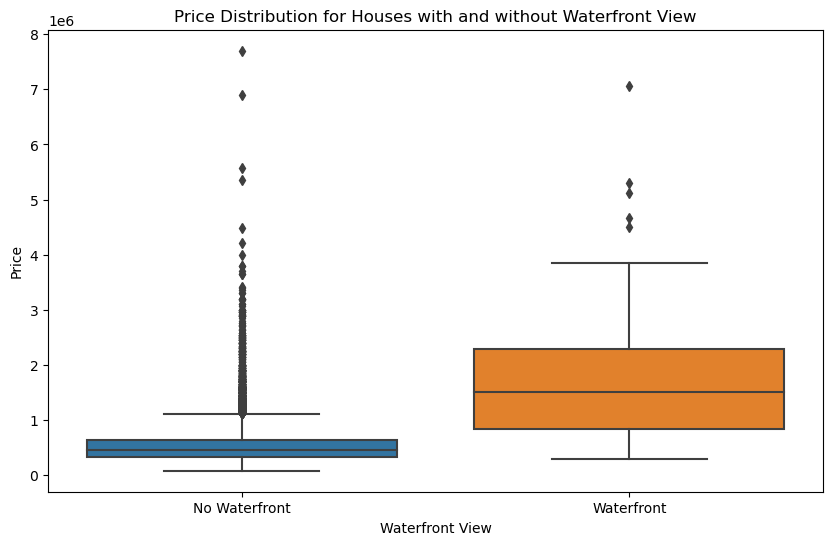

In [50]:
#bivariate analysis


# Create a boxplot to compare prices for houses with and without a waterfront view
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution for Houses with and without Waterfront View')
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.xticks([0, 1], ['No Waterfront', 'Waterfront'])
# Show the plot
plt.show()


From the analysis above, we can draw the following conclusions:

Houses with a waterfront view tend to have a wider price distribution compared to houses without a waterfront view. This is evident from the larger spread of prices in the boxplot for waterfront houses.
Houses with a waterfront view generally have a higher upper quartile (75th percentile) price range compared to houses without a waterfront view, as indicated by the upper end of the box in the boxplot.

Houses without a waterfront view have a higher concentration of prices in the lower quartile (25th percentile) range, suggesting that they are generally more affordable than waterfront houses.

# 4.3 Multivariate analysis

In [51]:
#multivariate analysis
#We can use the Pandas method corr() to find the feature other than price that is most correlated with price

df.corr()['price'].sort_values()

id            -0.017436
yr_built       0.053532
condition      0.073814
sqft_lot       0.087010
floors         0.258300
waterfront     0.276298
bedrooms       0.317748
bathrooms      0.527364
grade          0.667255
sqft_living    0.704666
price          1.000000
Name: price, dtype: float64

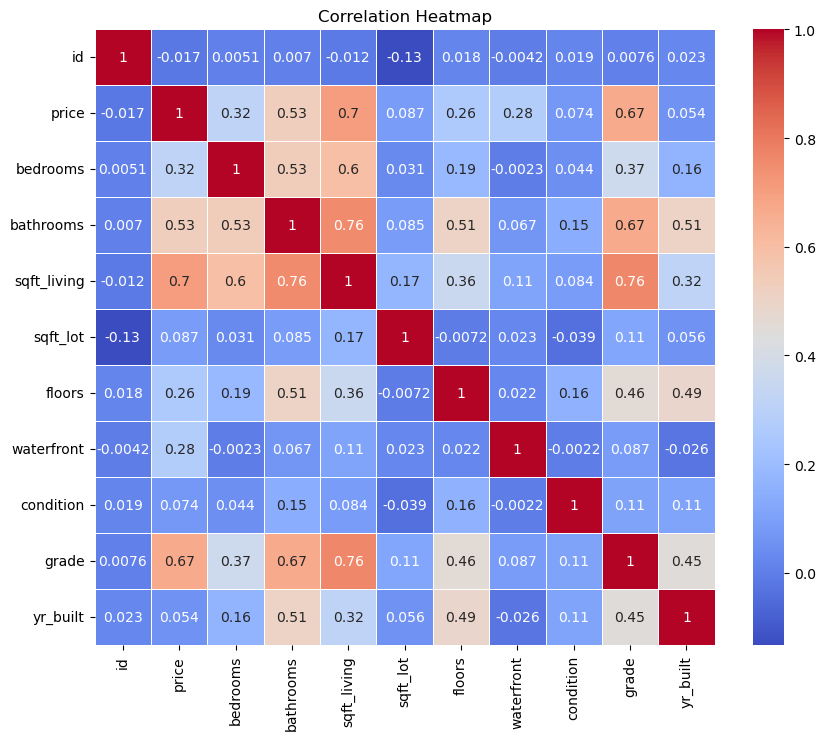

In [52]:
# Calculate the correlations
correlations = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


This analysis helps us understand which features are more strongly associated with the price of a house. It suggests that features related to the size, quality, and specific amenities of a house, such as sqft_living, grade, and waterfront view, have a significant impact on the house's price.

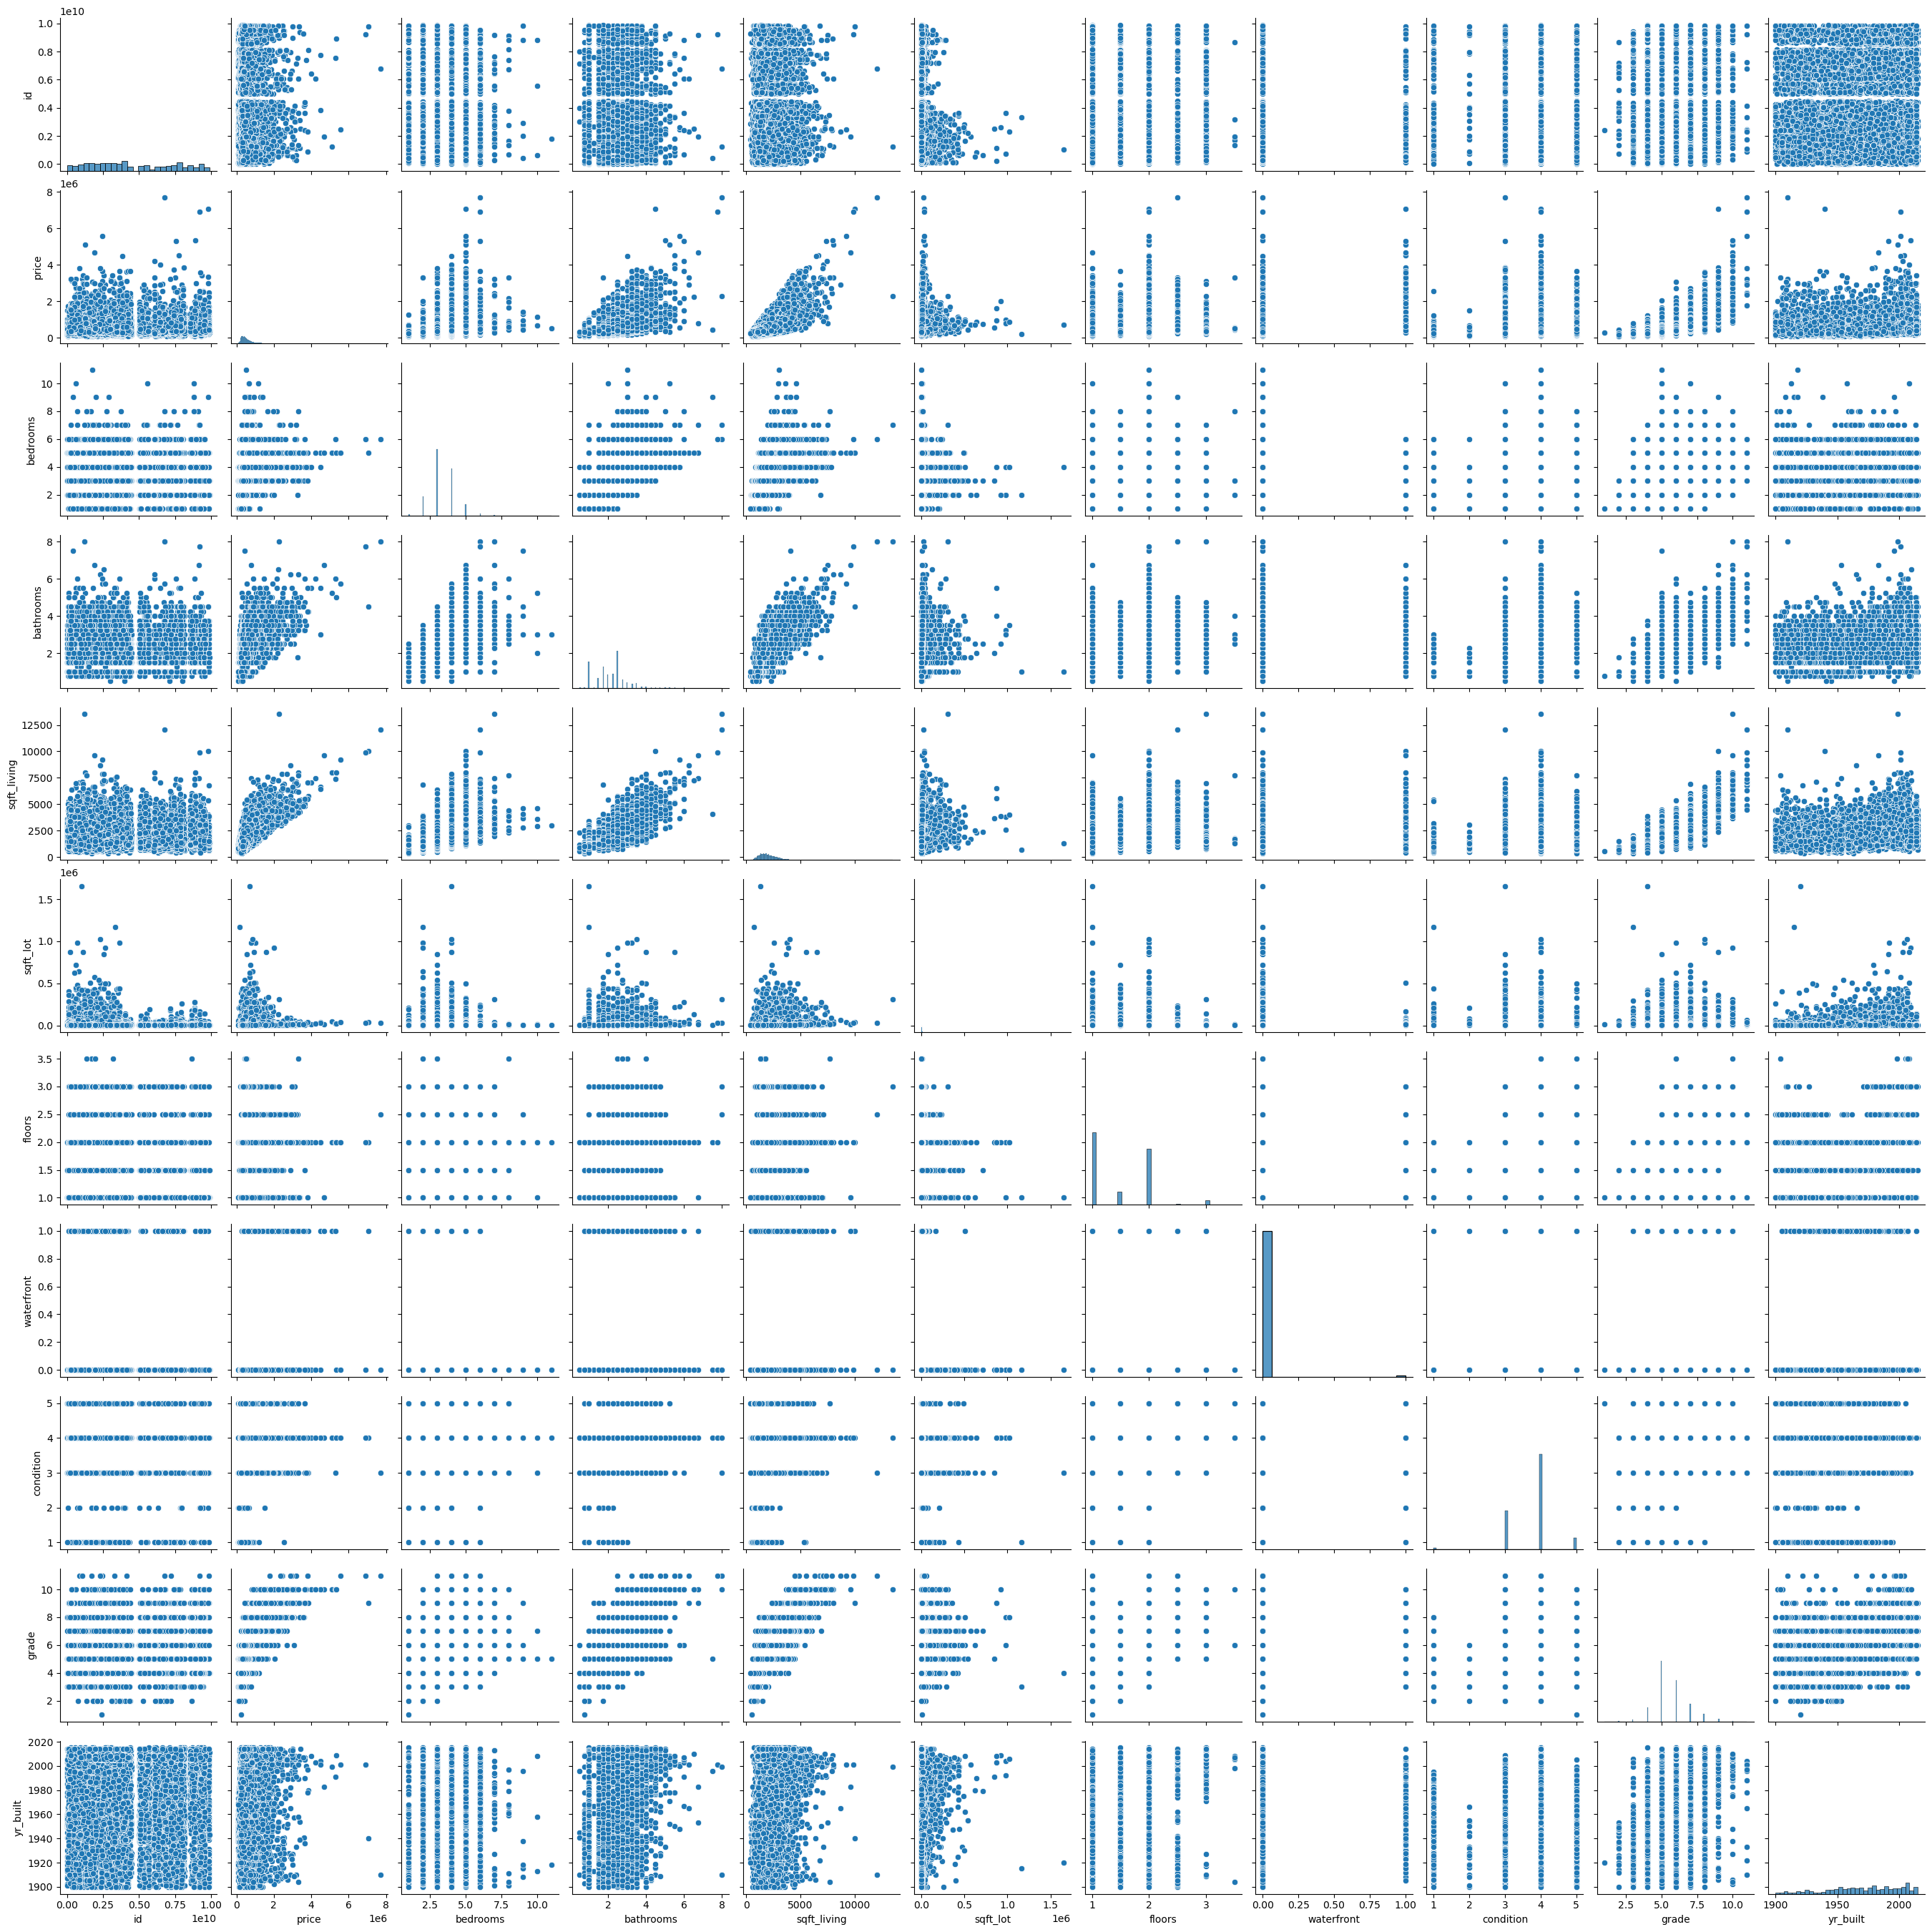

In [53]:
sns.pairplot(df)
plt.show()

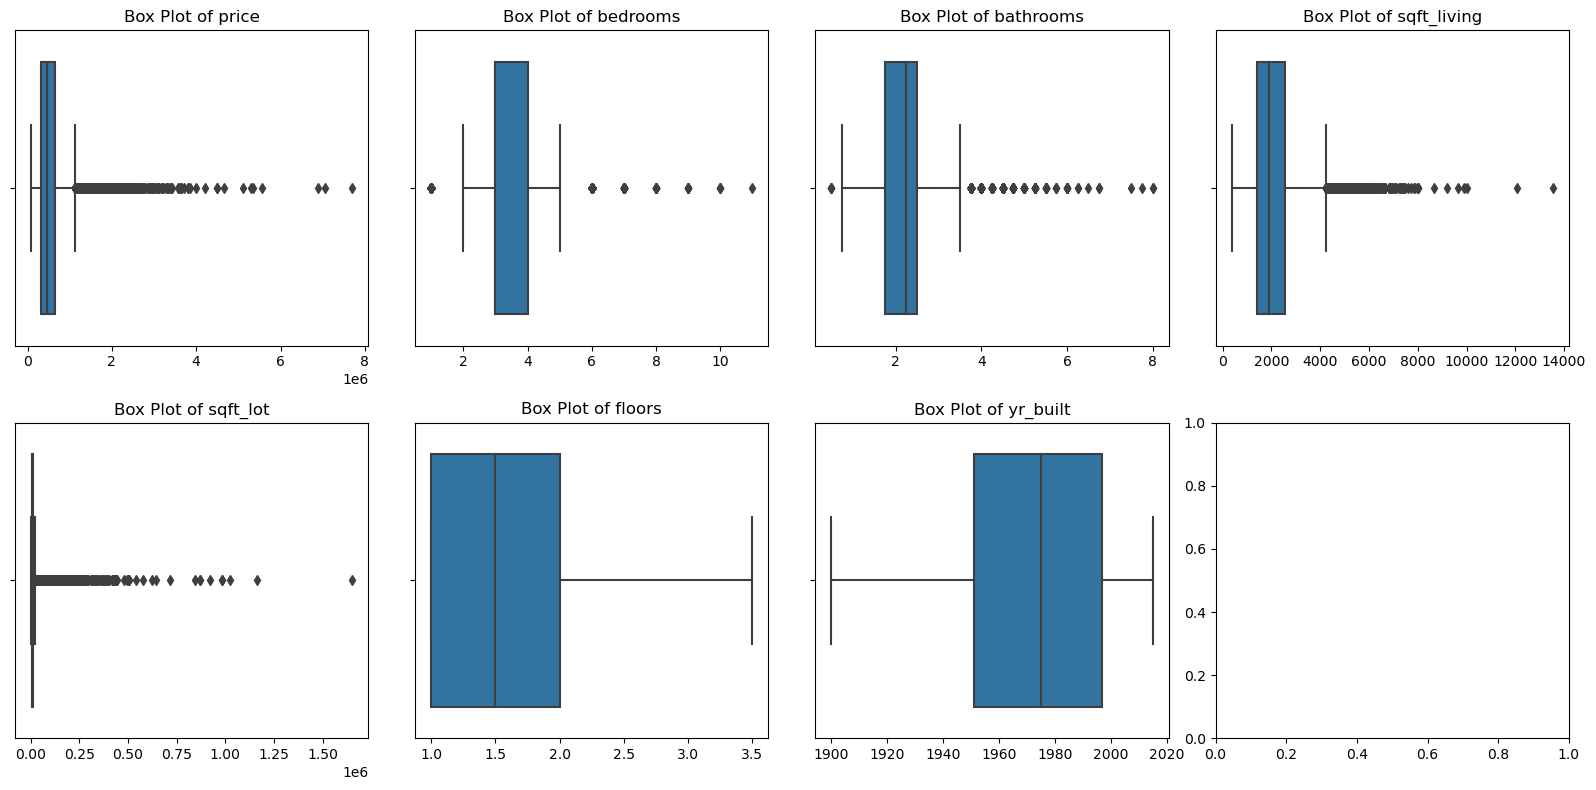

In [54]:
# Create a figure and a set of subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Specify the numerical columns for which you want to create box plots
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

# Loop through the columns and create box plots
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Box Plot of {col}')
    axes[i//4, i%4].set_xlabel('')  # Remove x-axis label for better readability

# Adjust the layout
plt.tight_layout()
plt.show()


# 5.1 Modeling